In [1]:
import tristats
import pandas as pd

### Women's team results

In [2]:
# Read in split data for women's race
women_splits = pd.read_csv("mts_data/2025-mts-splits-women.csv", na_values="NA")

# Read in team data for women's race
women_teams = pd.read_csv("mts_data/2025-mts-teams-women.csv", na_values="NA")

# Merge team and split data, then drop duplicate/useless columns
womens = pd.merge(women_teams, women_splits, on=["Bib No", "Name"])
womens.drop(columns=["Overall", "Bib No", "Time", "Penalty_x", "Penalty_y"], inplace=True)

# Index by overall place
womens.set_index("Place", inplace=True)

# Store athletes
ucla_women = womens.loc[womens["School Team"] == "UCLA"].copy()
ucla_women.dropna(inplace=True)  # Need complete split data
ucla_women = ucla_women.loc[:,"Name"]  # Just select names

# Display UCLA results
womens.loc[womens["School Team"] == "UCLA"]

,Name,School Team,Swim Rank,Swim,T1,Bike Rank,Bike,T2,Run Rank,Run,Total
Place,,,,,,,,,,,
10,Aliyah Anderson,UCLA,45,00:14:49,00:00:56,21.0,01:22:16,00:00:51,8,00:40:34,02:19:27
20,Eleanor Casey,UCLA,3,00:11:38,00:01:17,30.0,01:26:08,00:00:46,17,00:42:42,02:22:30
22,Cadence Chang,UCLA,8,00:12:51,00:01:30,39.0,01:28:13,00:00:35,11,00:41:23,02:24:31
31,Lily Aronovitz,UCLA,94,01:43:34,NaN,36.0,01:27:50,NaN,45,00:46:29,02:29:18
46,Mia McKiernan,UCLA,37,00:14:17,00:01:32,55.0,01:31:09,00:00:50,56,00:48:16,02:36:05
53,Alison Arndt,UCLA,66,00:16:57,00:01:32,63.0,01:32:50,00:00:49,44,00:46:26,02:38:33
70,Reena Choi,UCLA,68,00:17:17,00:01:59,68.0,01:34:12,00:00:58,71,00:52:22,02:46:49
71,Jolie Rice,UCLA,40,00:14:25,00:02:28,72.0,01:37:09,00:00:23,72,00:52:27,02:46:53
91,Triniti Santos,UCLA,54,00:15:41,00:02:41,96.0,02:02:26,00:01:22,93,01:05:16,03:27:27


### Men's team results

In [3]:
# Read in split data for men's race
mens_splits = pd.read_csv("mts_data/2025-mts-splits-men.csv", na_values="NA")

# Read in team data for men's race
mens_teams = pd.read_csv("mts_data/2025-mts-teams-men.csv", na_values="NA")

# Merge team and split data, then drop duplicate/useless columns
mens = pd.merge(mens_teams, mens_splits, on=["Bib No", "Name"])
mens.drop(columns=["Overall", "Bib No", "Time", "Penalty_x", "Penalty_y"], inplace=True)

# Index by overall place
mens.set_index("Place", inplace=True)

# Drop mistimed rows
mens.drop(67, inplace=True)  # Mistimed bike
mens.drop(102, inplace=True)  # Mistimed swim

# Store athletes
ucla_men = mens.loc[mens["School Team"] == "UCLA"].copy()
ucla_men.dropna(inplace=True)  # Need complete split data
ucla_men = ucla_men.loc[:,"Name"]  # Just select names

# Display UCLA results
mens.loc[mens["School Team"] == "UCLA"]

,Name,School Team,Swim Rank,Swim,T1,Bike Rank,Bike,T2,Run Rank,Run,Total
Place,,,,,,,,,,,
1,Edoardo Giuseppe Leone,UCLA,3,00:10:43,00:00:56,3.0,01:01:32,00:00:31,2,00:30:53,01:44:36
19,Emiliano Olivo Cauberghs,UCLA,139,01:23:21,NaN,33.0,01:10:12,NaN,26,00:36:51,01:59:41
66,Jacob Niyazov,UCLA,107,00:18:16,00:02:00,72.0,01:18:10,00:00:53,39,00:38:16,02:17:36
83,Lachlan Guo,UCLA,43,00:13:55,00:01:11,110.0,01:24:58,00:00:41,92,00:44:37,02:25:22
120,Austin Liu,UCLA,94,00:17:38,00:01:17,86.0,01:20:31,00:01:28,137,00:54:06,02:34:59
138,Lucas Angier,UCLA,83,00:16:32,00:01:35,145.0,01:34:57,00:00:30,132,00:51:14,02:44:48
140,Waleed Alzarooni,UCLA,126,00:20:34,00:02:09,124.0,01:29:10,00:01:09,140,00:54:47,02:47:51


### Men's time distributions by legs

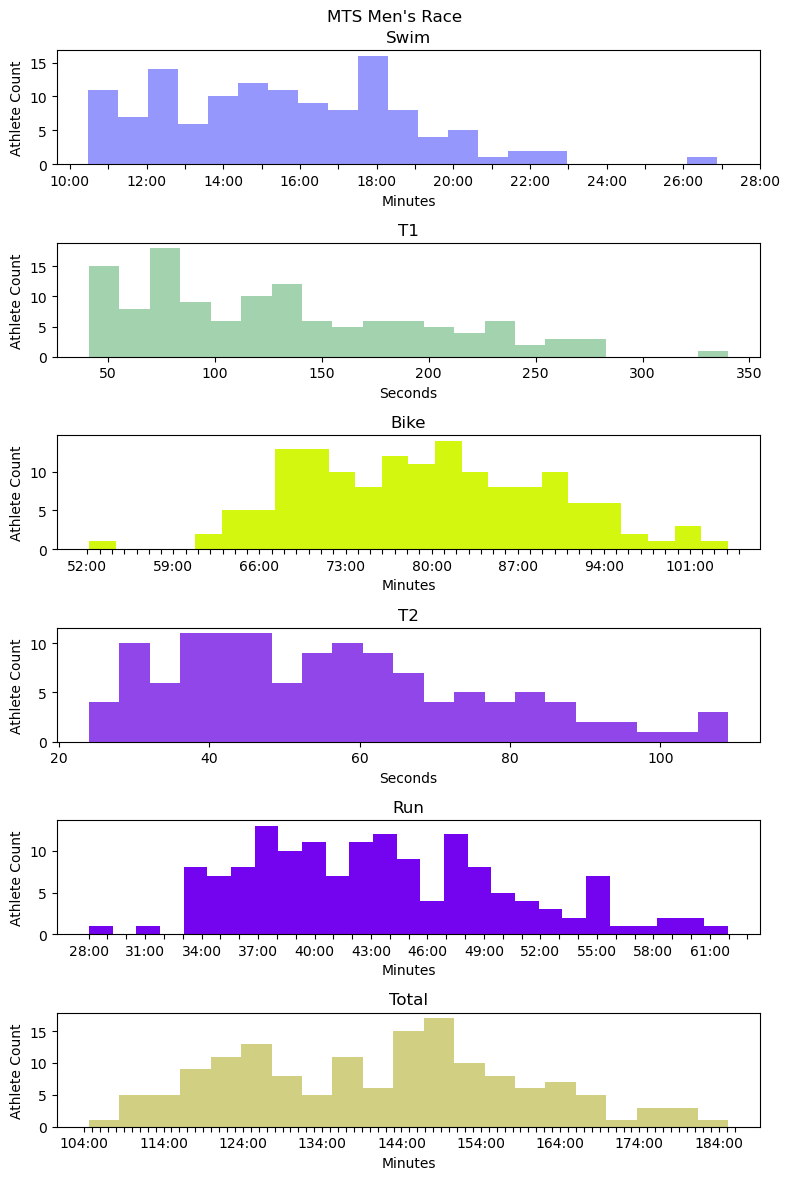

In [4]:
tristats.get_histograms(mens, "MTS Men's Race")

### Women's time distribution by legs

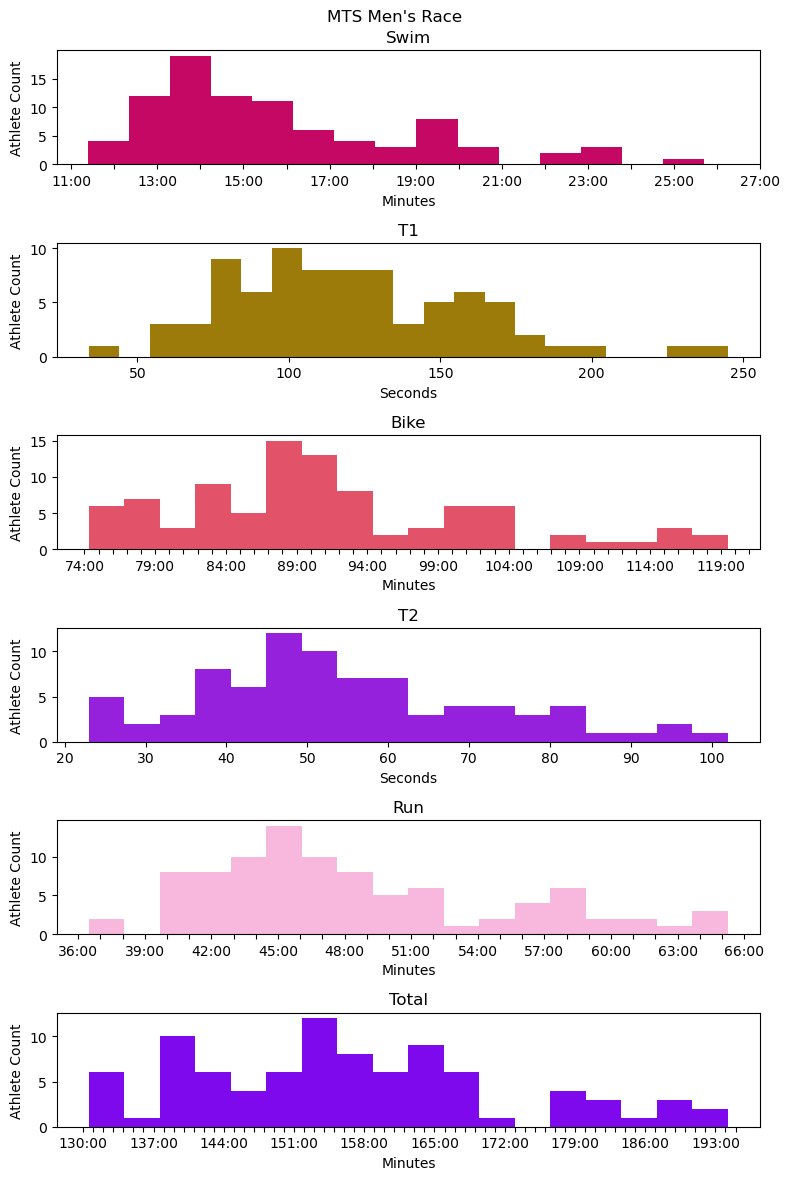

In [5]:
tristats.get_histograms(womens, "MTS Men's Race")

### Women's position charts

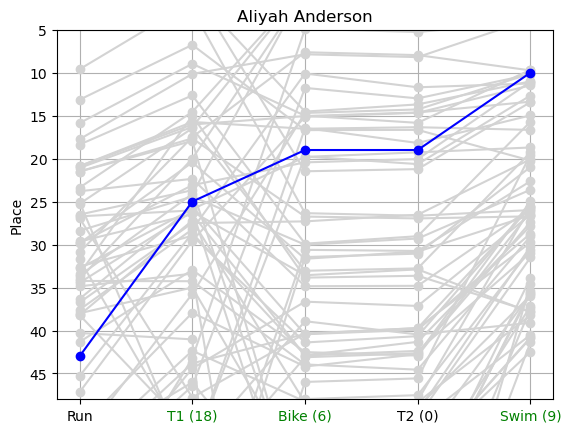

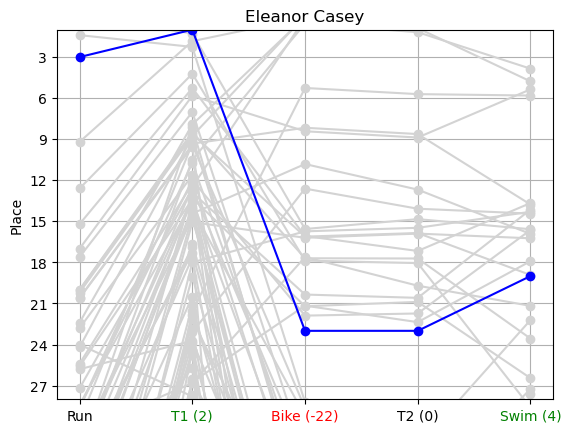

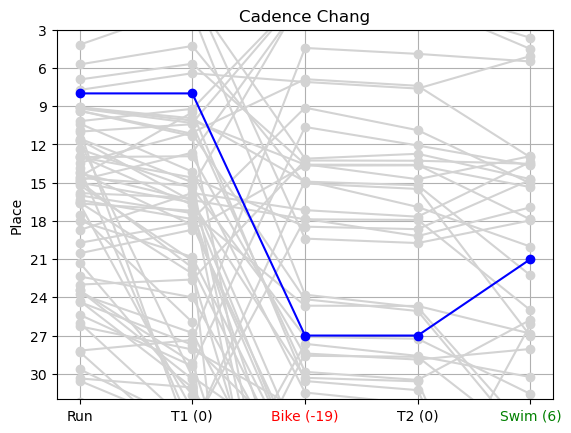

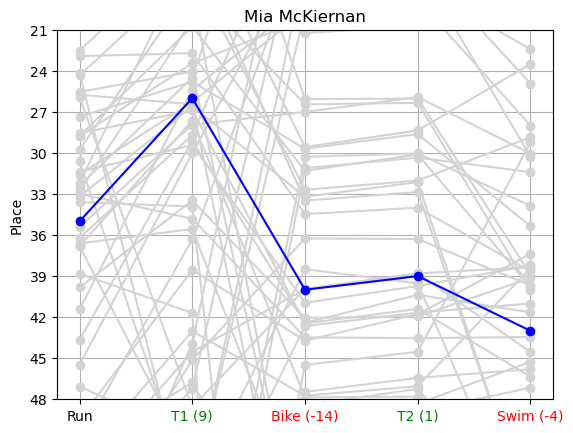

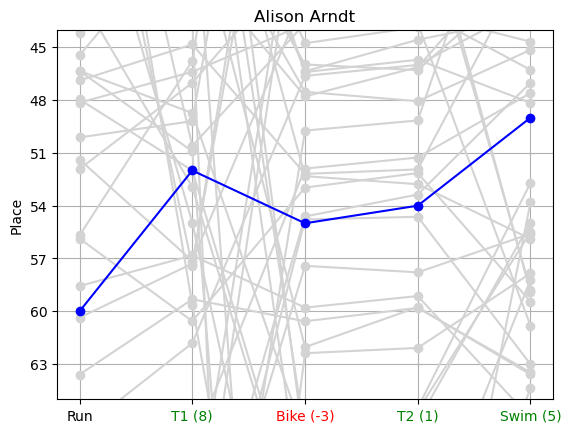

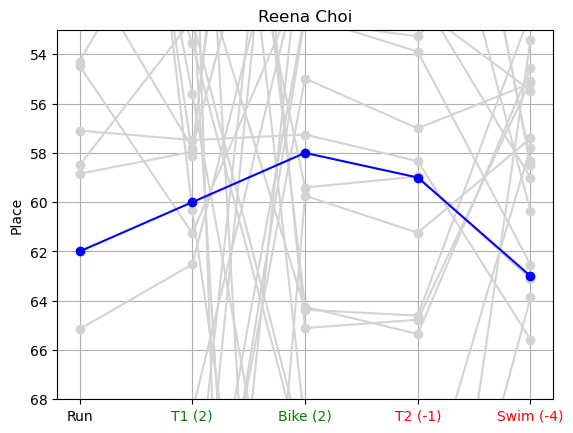

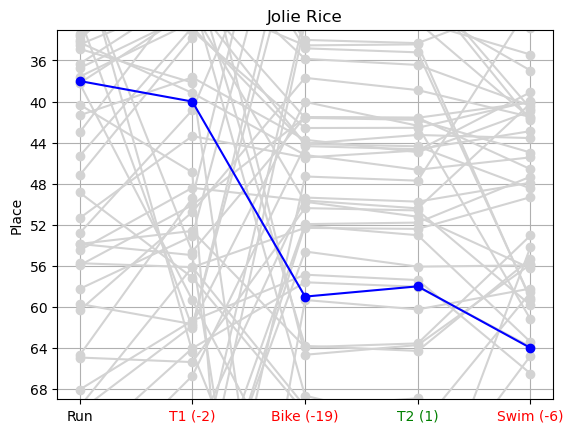

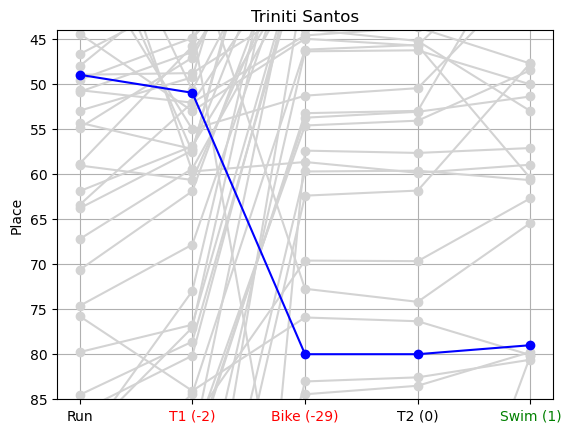

In [6]:
womens_positions = tristats.get_position(womens)
for athlete in ucla_women:
    tristats.get_place_chart(womens_positions, athlete)

### Men's position charts

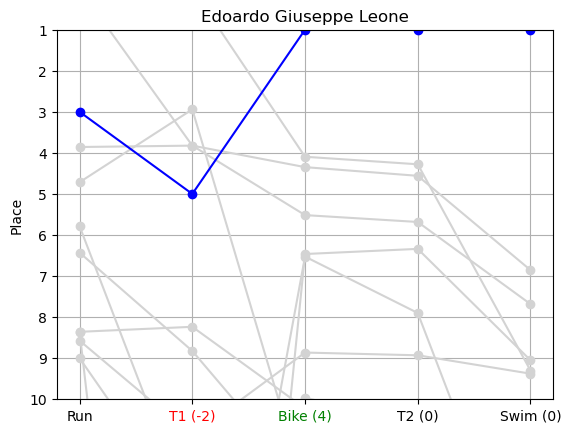

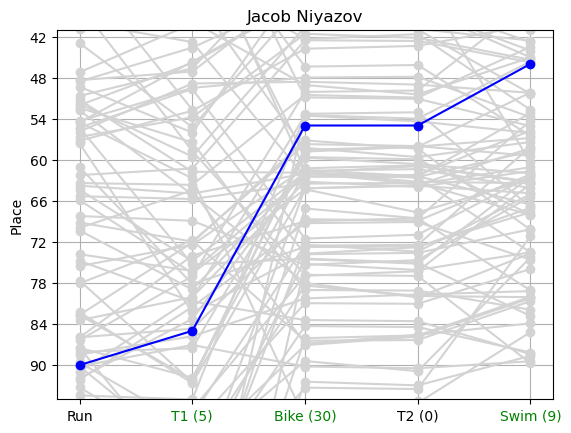

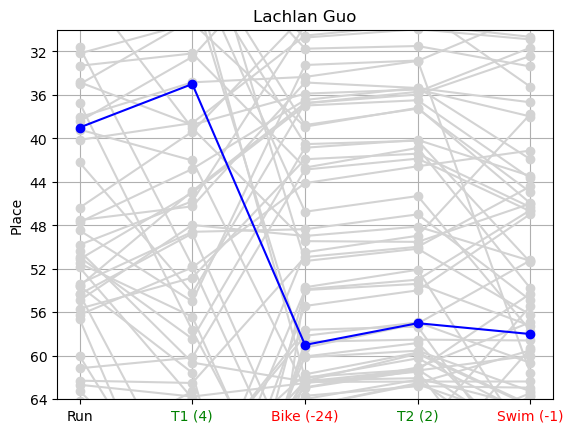

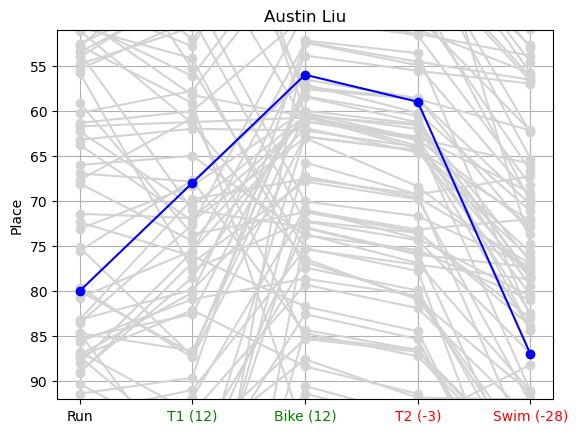

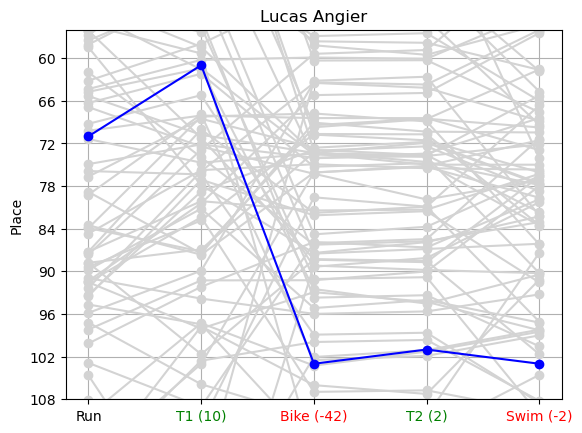

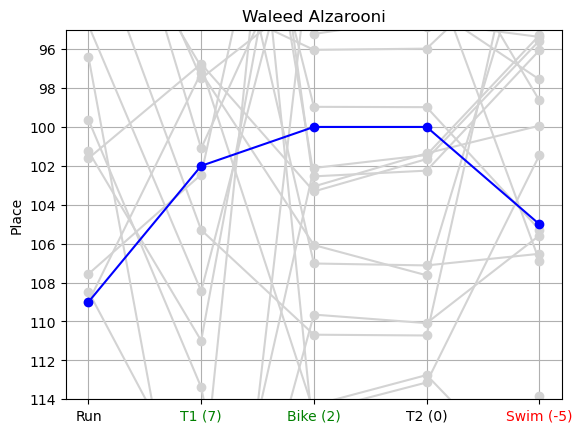

In [7]:
mens_positions = tristats.get_position(mens)
for athlete in ucla_men:
    tristats.get_place_chart(mens_positions, athlete)

### Men's race leg importance

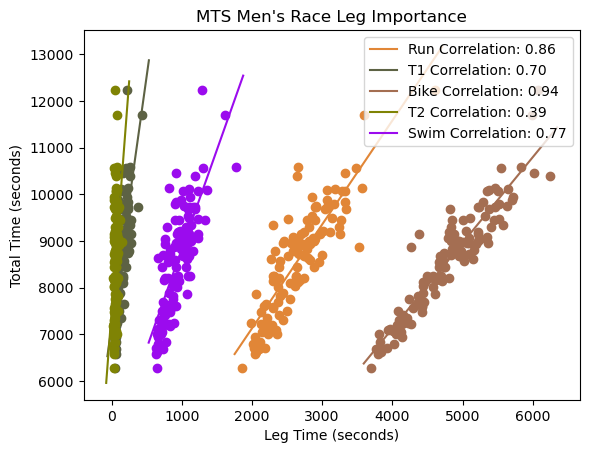

In [8]:
tristats.race_leg_imp(mens, "MTS Men's Race")

### Women's race leg importance

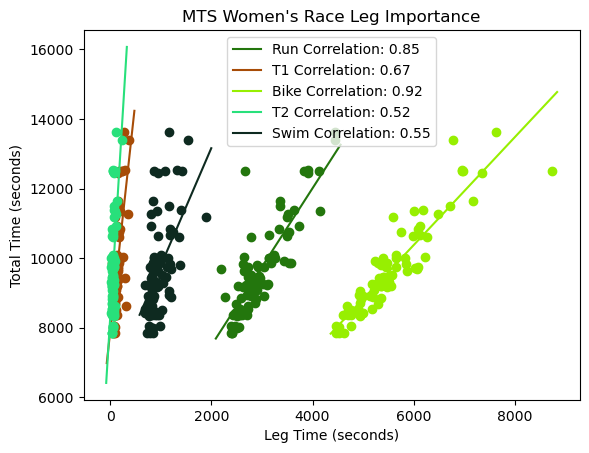

In [9]:
tristats.race_leg_imp(womens, "MTS Women's Race")